# Intro

## 🧁 Diabetes Classification – Multiple ML Models

## 📌 Overview
This project tackles a **Diabetes classification problem** using a real-world dataset. The goal is to predict whether a patient has diabetes based on medical features and lifestyle indicators. 

The task is approached using **multiple machine learning models** and **various feature scaling techniques**, allowing us to identify the optimal pipeline for predictive accuracy and clinical reliability.

---

## 📁 Dataset Description:


| Column | Description | Values / Meaning |
|------|------------|------------------|
|` Diabetes_binary `| Indicates whether the person has diabetes | 0 = No diabetes, 1 = Diabetes |
|`HighBP` | Whether the person has high blood pressure | 0 = No, 1 = Yes |
|`HighChol` | Whether the person has high cholesterol | 0 = No, 1 = Yes |
|`CholCheck` | Whether cholesterol was checked in the last 5 years | 0 = No, 1 = Yes |
|`BMI` | Body Mass Index | Continuous numeric value |
|`Smoker` | Has smoked at least 100 cigarettes in lifetime | 0 = No, 1 = Yes |
|`Stroke` | History of stroke | 0 = No, 1 = Yes |
|`HeartDiseaseorAttack` | History of heart disease or heart attack | 0 = No, 1 = Yes |
|`PhysActivity` | Physical activity in past 30 days | 0 = No, 1 = Yes |
|`Fruits` | Consumes fruit 1 or more times per day | 0 = No, 1 = Yes |
|`Veggies` | Consumes vegetables 1 or more times per day | 0 = No, 1 = Yes |
|`HvyAlcoholConsump` | Heavy alcohol consumption | 0 = No, 1 = Yes |
|`AnyHealthcare` | Has any kind of health care coverage | 0 = No, 1 = Yes |
|`NoDocbcCost` | Could not see a doctor due to cost | 0 = No, 1 = Yes |
|`GenHlth` | General health self-rating | 1 = Excellent → 5 = Poor |
|`MentHlth` | Days of poor mental health in last 30 days | 0–30 days |
|`PhysHlth` | Days of poor physical health in last 30 days | 0–30 days |
|`DiffWalk` | Difficulty walking or climbing stairs | 0 = No, 1 = Yes |
|`Sex` | Gender | 0 = Female, 1 = Male |
|`Age` | Age group category | 1 = 18–24 → 13 = 80+ |
|`Education` | Education level | 1 = Never attended school → 6 = College graduate |
|`Income` | Income category | 1 = < $10k → 8 = > $75k |

📌 Dataset Source:

## 🔍 Exploratory Data Analysis (EDA)
* **Class Distribution Analysis:** Checking for class imbalance in the target variable to decide on resampling strategies.
* **Correlation HeatMapping:** Identifying strong predictors (e.g., the link between `BMI`, `HighBP`, and `Diabetes`).
* **Feature Profiling:** Analyzing the impact of lifestyle choices like `Fruits` and `Veggies` consumption on diabetic outcomes.
* **Class Balance Verification:** A critical check of the `Diabetes_binary` distribution. In medical datasets, non-diabetic cases often significantly outnumber diabetic ones, requiring a strategy to handle this skew.

---

## 🏗️ Pipeline Model
Since the majority of the features are binary or pre-categorized, **feature scaling (like StandardScaler) is not required**. The pipeline is streamlined for efficiency:
* **Step 1:** Data validation to ensure input types match the model requirements.
* **Step 2:** Model training using algorithms that naturally handle binary and ordinal data.
* **Step 3:** Hyperparameter optimization via `RandomizedSearchCV` to find the best model configuration.

---

## 🤖 ML Models Trained
Several classification models were trained and benchmarked:

| Model | Description | Key Strength |
| :--- | :--- | :--- |
| **Logistic Regression** | Linear model for classification | Highly interpretable and fast. |
| **K-Nearest Neighbors** | Distance-based classifier | Excellent at capturing local patterns. |
| **SVM** | Support Vector Machine | High accuracy in high-dimensional spaces. |
| **Decision Tree** | Tree-based model | Visualizes decision logic clearly. |
| **Naive Bayes** | Probabilistic classifier | Highly efficient and works well with independence assumptions. |
| **Random Forest** | Ensemble of decision trees | Robust and reduces overfitting. |


---

## ⚖️ Benchmark & Evaluation
The models were evaluated using a comprehensive suite of metrics:
* **Accuracy:** The overall percentage of correct predictions.
* **Precision & Recall:** Critical for medical tasks—Recall ensures we minimize "False Negatives" (missing a diabetic patient).
* **F1-Score:** The harmonic mean of Precision and Recall.
* **ROC-AUC Score:** Measuring the model's ability to distinguish between classes across all thresholds.
---




## Expolratory Data Analysis ''EDA''

### Import libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import data

In [8]:
df = pd.read_csv(r"../Data/diabetes.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Remap the data for EDA

In [3]:
label_maps = {
    "Diabetes_binary": {
        0: "No Diabetes",
        1: "Diabetes"
    },
    "HighBP": {
        0: "No High BP",
        1: "High BP"
    },
    "HighChol": {
        0: "No High Cholesterol",
        1: "High Cholesterol"
    },
    "CholCheck": {
        0: "No Chol Check",
        1: "Chol Checked"
    },
    "Smoker": {
        0: "Non-Smoker",
        1: "Smoker"
    },
    "Stroke": {
        0: "No Stroke",
        1: "Stroke"
    },
    "HeartDiseaseorAttack": {
        0: "No Heart Disease",
        1: "Heart Disease / Attack"
    },
    "PhysActivity": {
        0: "No Physical Activity",
        1: "Physically Active"
    },
    "Fruits": {
        0: "No Daily Fruits",
        1: "Daily Fruits"
    },
    "Veggies": {
        0: "No Daily Veggies",
        1: "Daily Veggies"
    },
    "HvyAlcoholConsump": {
        0: "Not Heavy Drinker",
        1: "Heavy Drinker"
    },
    "AnyHealthcare": {
        0: "No Healthcare",
        1: "Has Healthcare"
    },
    "NoDocbcCost": {
        0: "Can Afford Doctor",
        1: "Cannot Afford Doctor"
    },
    "DiffWalk": {
        0: "No Difficulty Walking",
        1: "Difficulty Walking"
    },
    "Sex": {
        0: "Female",
        1: "Male"
    },
    "GenHlth": {
        1: "Excellent",
        2: "Very Good",
        3: "Good",
        4: "Fair",
        5: "Poor"
    },
    "Age": {
        1: "18–24",
        2: "25–29",
        3: "30–34",
        4: "35–39",
        5: "40–44",
        6: "45–49",
        7: "50–54",
        8: "55–59",
        9: "60–64",
        10: "65–69",
        11: "70–74",
        12: "75–79",
        13: "80+"
    },
    "Education": {
        1: "No School",
        2: "Elementary",
        3: "Some High School",
        4: "High School Graduate",
        5: "Some College",
        6: "College Graduate"
    },
    "Income": {
        1: "< $10k",
        2: "$10k–15k",
        3: "$15k–20k",
        4: "$20k–25k",
        5: "$25k–35k",
        6: "$35k–50k",
        7: "$50k–75k",
        8: "> $75k"
    }
}

df_eda = df.copy()

for col, mapping in label_maps.items():
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].map(mapping)


### Basic Check

In [4]:
df_eda.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Chol Checked,40.0,Smoker,No Stroke,No Heart Disease,No Physical Activity,No Daily Fruits,...,Has Healthcare,Can Afford Doctor,Poor,18.0,15.0,Difficulty Walking,Female,60–64,High School Graduate,$15k–20k
1,No Diabetes,No High BP,No High Cholesterol,No Chol Check,25.0,Smoker,No Stroke,No Heart Disease,Physically Active,No Daily Fruits,...,No Healthcare,Cannot Afford Doctor,Good,0.0,0.0,No Difficulty Walking,Female,50–54,College Graduate,< $10k
2,No Diabetes,High BP,High Cholesterol,Chol Checked,28.0,Non-Smoker,No Stroke,No Heart Disease,No Physical Activity,Daily Fruits,...,Has Healthcare,Cannot Afford Doctor,Poor,30.0,30.0,Difficulty Walking,Female,60–64,High School Graduate,> $75k
3,No Diabetes,High BP,No High Cholesterol,Chol Checked,27.0,Non-Smoker,No Stroke,No Heart Disease,Physically Active,Daily Fruits,...,Has Healthcare,Can Afford Doctor,Very Good,0.0,0.0,No Difficulty Walking,Female,70–74,Some High School,$35k–50k
4,No Diabetes,High BP,High Cholesterol,Chol Checked,24.0,Non-Smoker,No Stroke,No Heart Disease,Physically Active,Daily Fruits,...,Has Healthcare,Can Afford Doctor,Very Good,3.0,0.0,No Difficulty Walking,Female,70–74,Some College,$20k–25k


In [5]:
df_eda.shape

(253680, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Check Missing Values

In [8]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Correlation Analysis

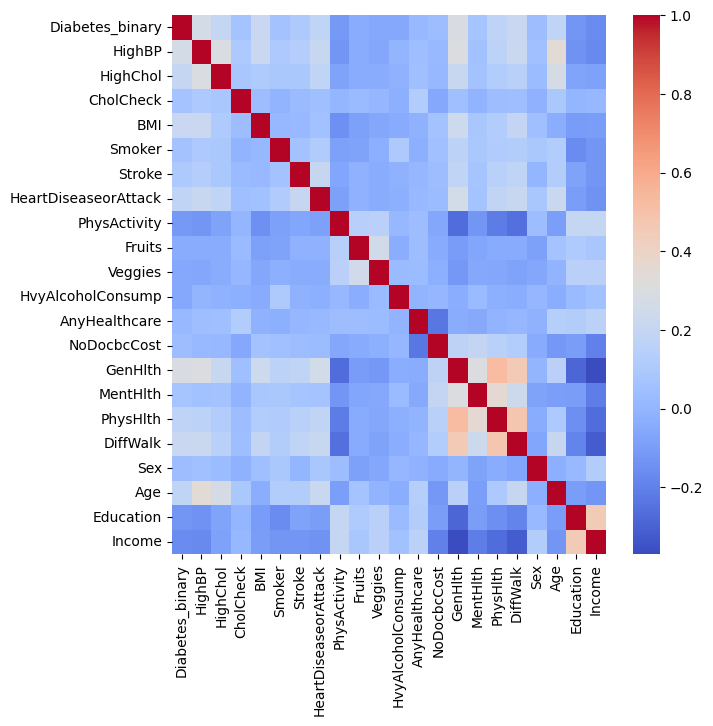

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

In [9]:
# top df.corr() columns
corr = df.corr()
top_corr = (
    corr["Diabetes_binary"]
    .drop("Diabetes_binary")
    .abs()
    .sort_values(ascending=False)
)

top_corr_list = top_corr.head(5).index.tolist() + ["Diabetes_binary"]

print(top_corr.head(5))

print(top_corr_list)

GenHlth     0.293569
HighBP      0.263129
DiffWalk    0.218344
BMI         0.216843
HighChol    0.200276
Name: Diabetes_binary, dtype: float64
['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Diabetes_binary']


### Feature Distribution

In [11]:
analysis_df = df_eda.groupby(['Sex', 'DiffWalk', 'HighChol']).agg({
    'Diabetes_binary': 'count',  
    'BMI': 'mean'                
}).reset_index()

analysis_df.columns = ['Sex', 'DiffWalk', 'HighChol', 'Total_Count', 'Avg_BMI']

print(analysis_df)

      Sex               DiffWalk             HighChol  Total_Count    Avg_BMI
0  Female     Difficulty Walking     High Cholesterol        15797  31.910996
1  Female     Difficulty Walking  No High Cholesterol        11398  31.133444
2  Female  No Difficulty Walking     High Cholesterol        42475  28.072254
3  Female  No Difficulty Walking  No High Cholesterol        72304  26.865540
4    Male     Difficulty Walking     High Cholesterol         9087  31.152195
5    Male     Difficulty Walking  No High Cholesterol         6393  30.153449
6    Male  No Difficulty Walking     High Cholesterol        40232  28.896475
7    Male  No Difficulty Walking  No High Cholesterol        55994  27.999643


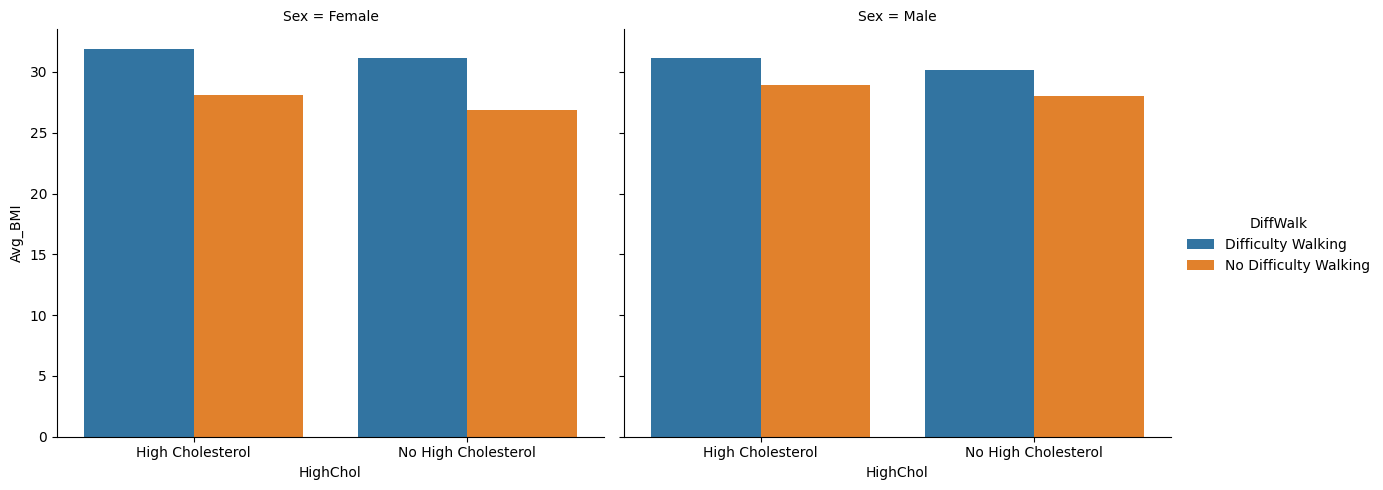

In [12]:
sns.catplot(
    data=analysis_df, 
    x='HighChol', 
    y='Avg_BMI', 
    hue='DiffWalk', 
    col='Sex', 
    kind='bar', 
    height=5, 
    aspect=1.2
)
plt.show()

In [13]:
analysis_df = df_eda.groupby(['Sex', 'GenHlth', 'HighBP']).agg({
    'Diabetes_binary': 'count',  
    'BMI': 'mean'                
}).reset_index()

analysis_df.columns = ['Sex', 'GenHlth', 'HighBP', 'Total_Count', 'Avg_BMI']

print(analysis_df)

       Sex    GenHlth      HighBP  Total_Count    Avg_BMI
0   Female  Excellent     High BP         4309  26.711070
1   Female  Excellent  No High BP        21246  24.660454
2   Female       Fair     High BP        11570  31.788245
3   Female       Fair  No High BP         6744  29.391014
4   Female       Good     High BP        20703  30.462252
5   Female       Good  No High BP        20669  28.430742
6   Female       Poor     High BP         4729  32.063650
7   Female       Poor  No High BP         2264  28.344081
8   Female  Very Good     High BP        16342  28.575266
9   Female  Very Good  No High BP        33398  26.579526
10    Male  Excellent     High BP         4840  27.931198
11    Male  Excellent  No High BP        14904  26.367485
12    Male       Fair     High BP         8973  31.131951
13    Male       Fair  No High BP         4283  28.806911
14    Male       Good     High BP        18209  30.458784
15    Male       Good  No High BP        16065  28.596452
16    Male    

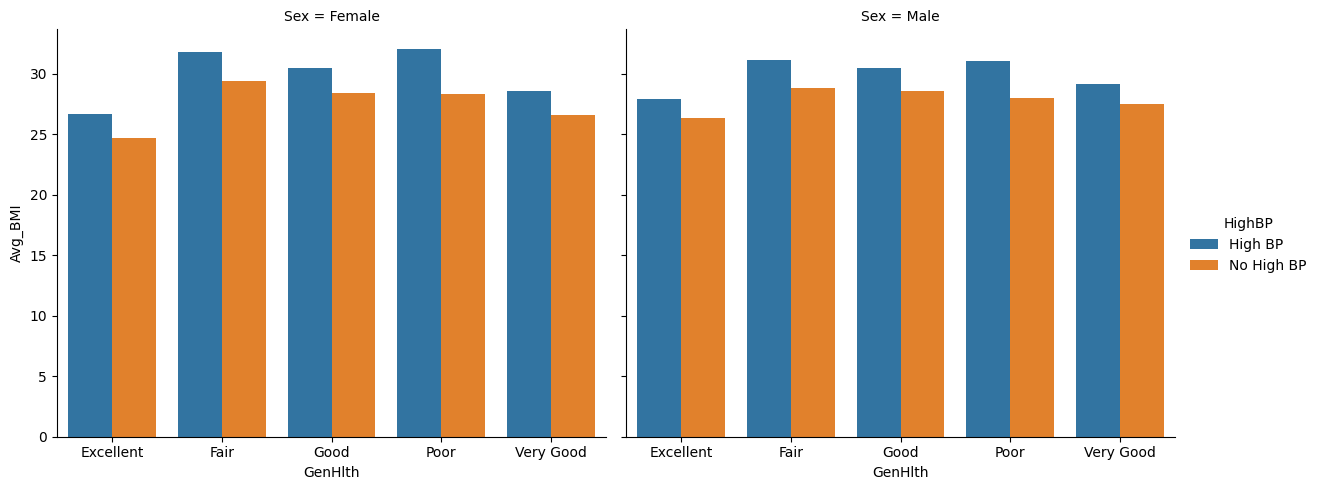

In [14]:
sns.catplot(
    data=analysis_df, 
    x='GenHlth', 
    y='Avg_BMI', 
    hue='HighBP', 
    col='Sex', 
    kind='bar', 
    height=5, 
    aspect=1.2
)
plt.show()

### Check Class Balance

In [15]:
print(df_eda.groupby("Diabetes_binary").size())

Diabetes_binary
Diabetes        35346
No Diabetes    218334
dtype: int64


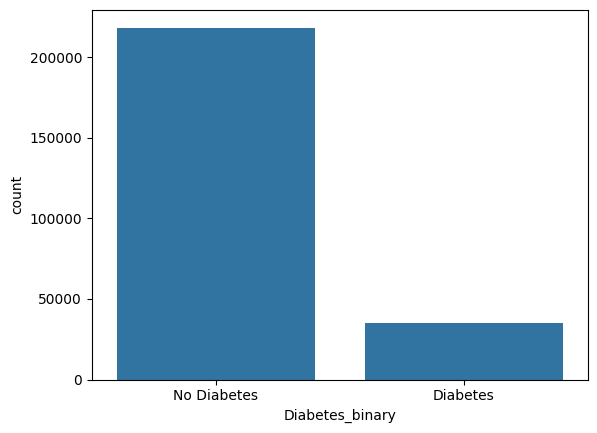

In [16]:
sns.countplot(x="Diabetes_binary", data=df_eda)
plt.show()

## Modeling Pipeline

### Import Libraries

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# add scaler

from sklearn.model_selection import train_test_split


### Imbalanced Data Handling And viwew the distribution

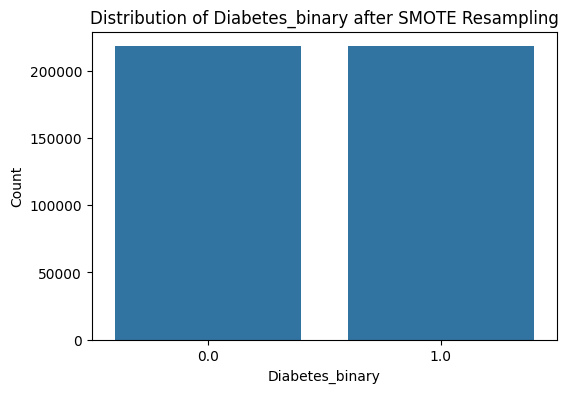

Diabetes_binary
0.0    218334
1.0    218334
Name: count, dtype: int64


In [10]:
x = df[top_corr_list].drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# show the distribution of the target variable after resampling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Distribution of Diabetes_binary after SMOTE Resampling")
plt.xlabel("Diabetes_binary")
plt.ylabel("Count")
plt.show()
print(y_resampled.value_counts())


### Data splitting

In [18]:
x = df[top_corr_list].drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y # stratify the split based on the target variable
)

### Pipeline Function for Multiple Models

In [1]:
def create_pipeline(model):
    return Pipeline(steps=[
        ("smote", SMOTE(sampling_strategy=0.7, random_state=42)),
        ("model", model)
    ])

## Benchmark

### Import Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)

### Models Dictionary

In [3]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD Classifier": SGDClassifier(loss="log_loss", random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=15,
        random_state=42
    ),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        n_jobs=-1,
        random_state=42
    )
}

### Evaluation

In [11]:
results = []
trained_pipelines = {}

for name, model in models.items():
    print(f"Training {name} ...")
    
    pipeline = create_pipeline(model)
    pipeline.fit(x_train, y_train)
    
    y_pred = pipeline.predict(x_test)
    
    # some models use decision_function instead of predict_proba
    if hasattr(pipeline, "predict_proba"):
        y_score = pipeline.predict_proba(x_test)[:, 1]
    else:
        y_score = pipeline.decision_function(x_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_score)
    })
    
    trained_pipelines[name] = pipeline

Training Logistic Regression ...
Training SGD Classifier ...
Training KNN ...
Training Decision Tree ...
Training Naive Bayes ...
Training Random Forest ...


### Results

In [12]:

benchmark_df = pd.DataFrame(results)
benchmark_df = benchmark_df.sort_values(by="ROC_AUC", ascending=False)

benchmark_df

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.776076,0.336881,0.626963,0.438269,0.801653
1,SGD Classifier,0.804478,0.366439,0.553261,0.440875,0.801532
5,Random Forest,0.768291,0.330095,0.644080,0.436487,0.796610
3,Decision Tree,0.769257,0.331001,0.642524,0.436920,0.794811
4,Naive Bayes,0.758396,0.319236,0.648182,0.427785,0.792400
2,KNN,0.851309,0.425150,0.190833,0.263425,0.710770


In [14]:
print(benchmark_df)

                 Model  Accuracy  Precision    Recall        F1   ROC_AUC
0  Logistic Regression  0.776076   0.336881  0.626963  0.438269  0.801653
1       SGD Classifier  0.804478   0.366439  0.553261  0.440875  0.801532
5        Random Forest  0.768291   0.330095  0.644080  0.436487  0.796610
3        Decision Tree  0.769257   0.331001  0.642524  0.436920  0.794811
4          Naive Bayes  0.758396   0.319236  0.648182  0.427785  0.792400
2                  KNN  0.851309   0.425150  0.190833  0.263425  0.710770


### Benchmark Visualization

#### All Metrics Bar

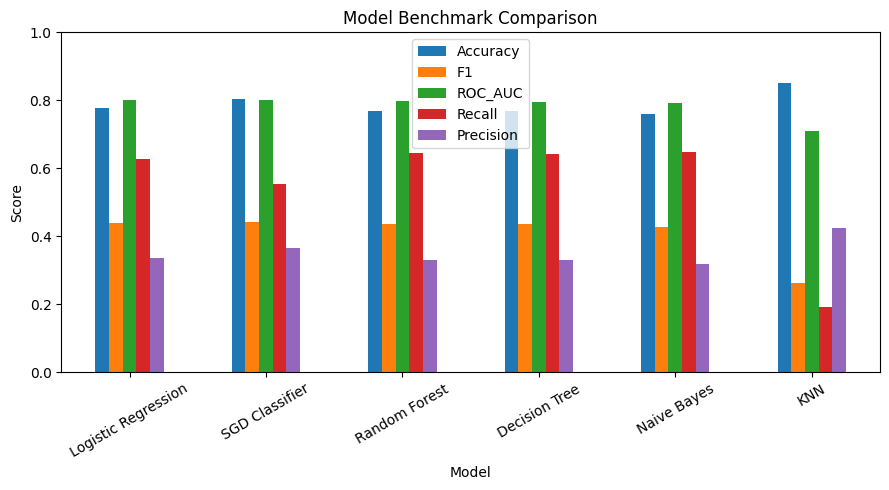

In [ ]:
benchmark_df.set_index("Model")[["Accuracy", "F1", "ROC_AUC","Recall", "Precision"]].plot.bar(
    figsize=(9, 5)
)

plt.title("Model Benchmark Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
# change the legend position 
plt.legend
plt.show()

#### Heatmap

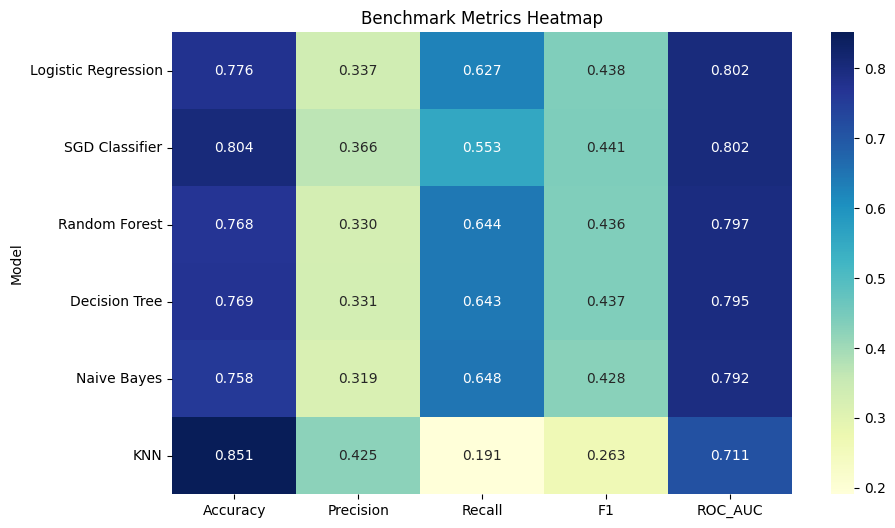

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    benchmark_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]],
    annot=True, fmt=".3f", cmap="YlGnBu"
)
plt.title("Benchmark Metrics Heatmap")
plt.show()


#### ROC Curve

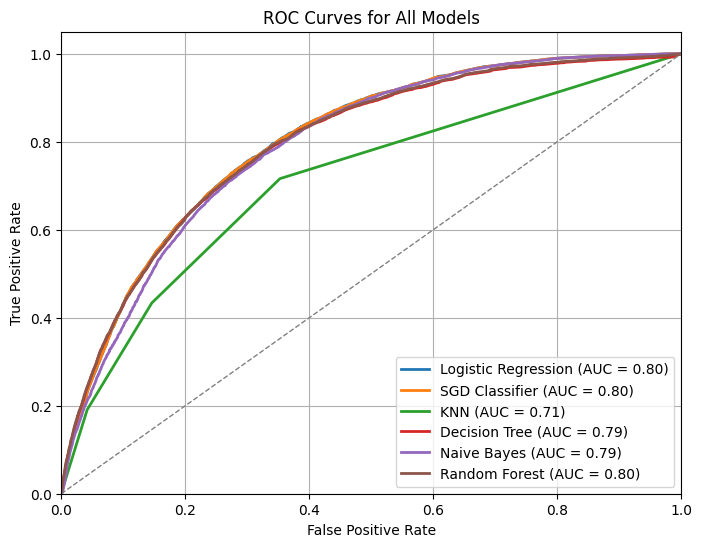

In [ ]:
plt.figure(figsize=(8, 6))

for name, pipeline in trained_pipelines.items():
    y_score = pipeline.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
